In [46]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline

Importing Data

In [48]:
df=pd.read_csv('framingham.csv')

In [49]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [51]:
df.shape

(4238, 16)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [53]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#check for duplicate values

In [54]:
df.duplicated().sum()

0

#check for missing values

In [55]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#check percentage of missing value

In [60]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

Observation ->
since it is only 12 percent of the entire dataset the rows with missing values are excluded.

In [61]:
df.dropna(axis=0,inplace=True)

Exploratory Analysis

In [63]:
# male column should be 'sex' column
df.rename(columns={'male':'sex'} , inplace=True)

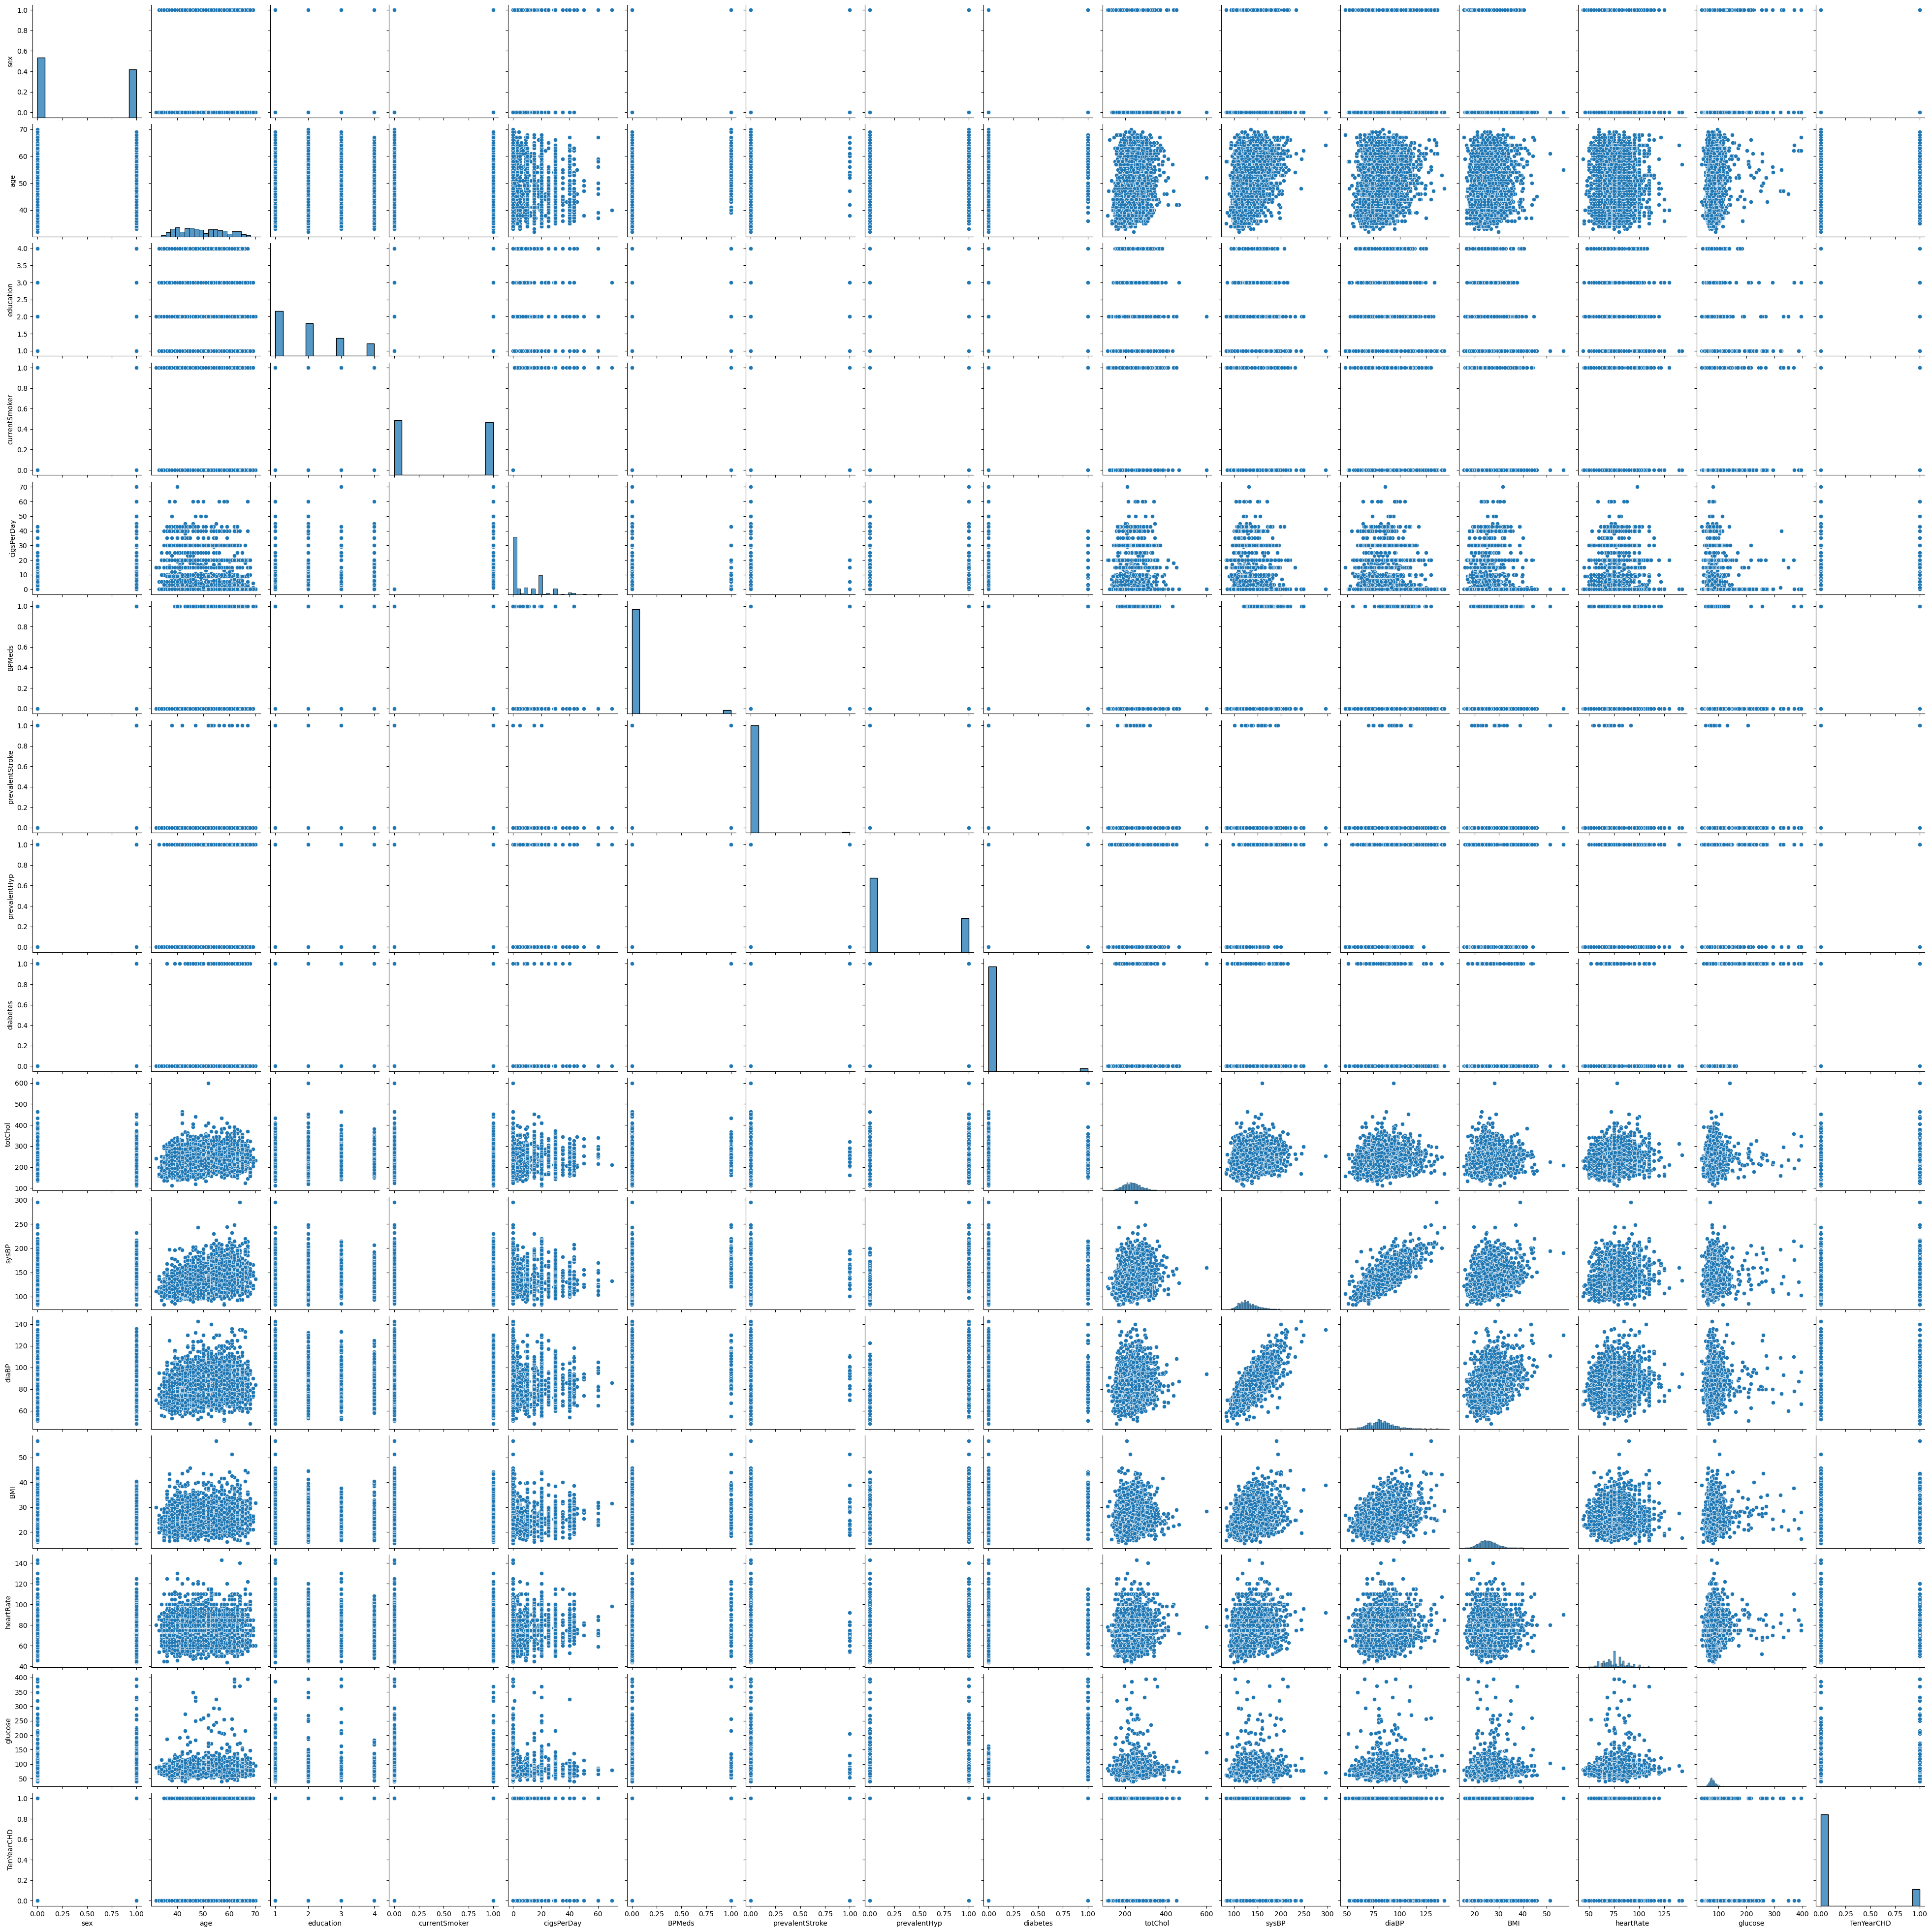

In [66]:
sns.pairplot(df)

In [67]:
'''creating feature name list for ease in futhure coding '''

contFeat = ['age' , 'cigsPerDay' , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose']
discreteFeat = ['sex' , 'currentSmoker' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes']
discreteFeat_withy = ['sex' , 'currentSmoker' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes' , 'TenYearCHD']

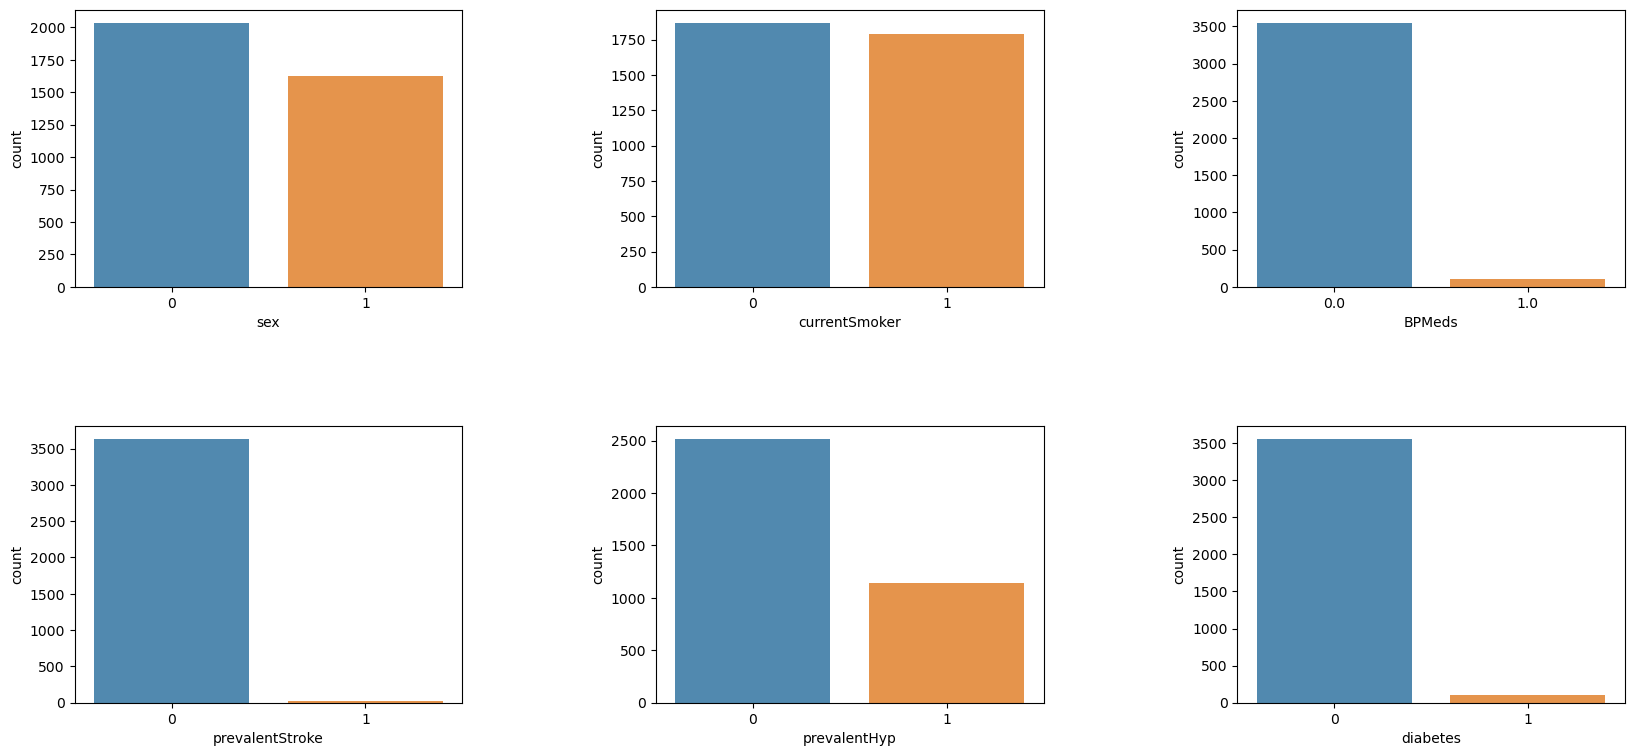

In [68]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in discreteFeat:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , data = df , alpha = 0.85)

plt.show()

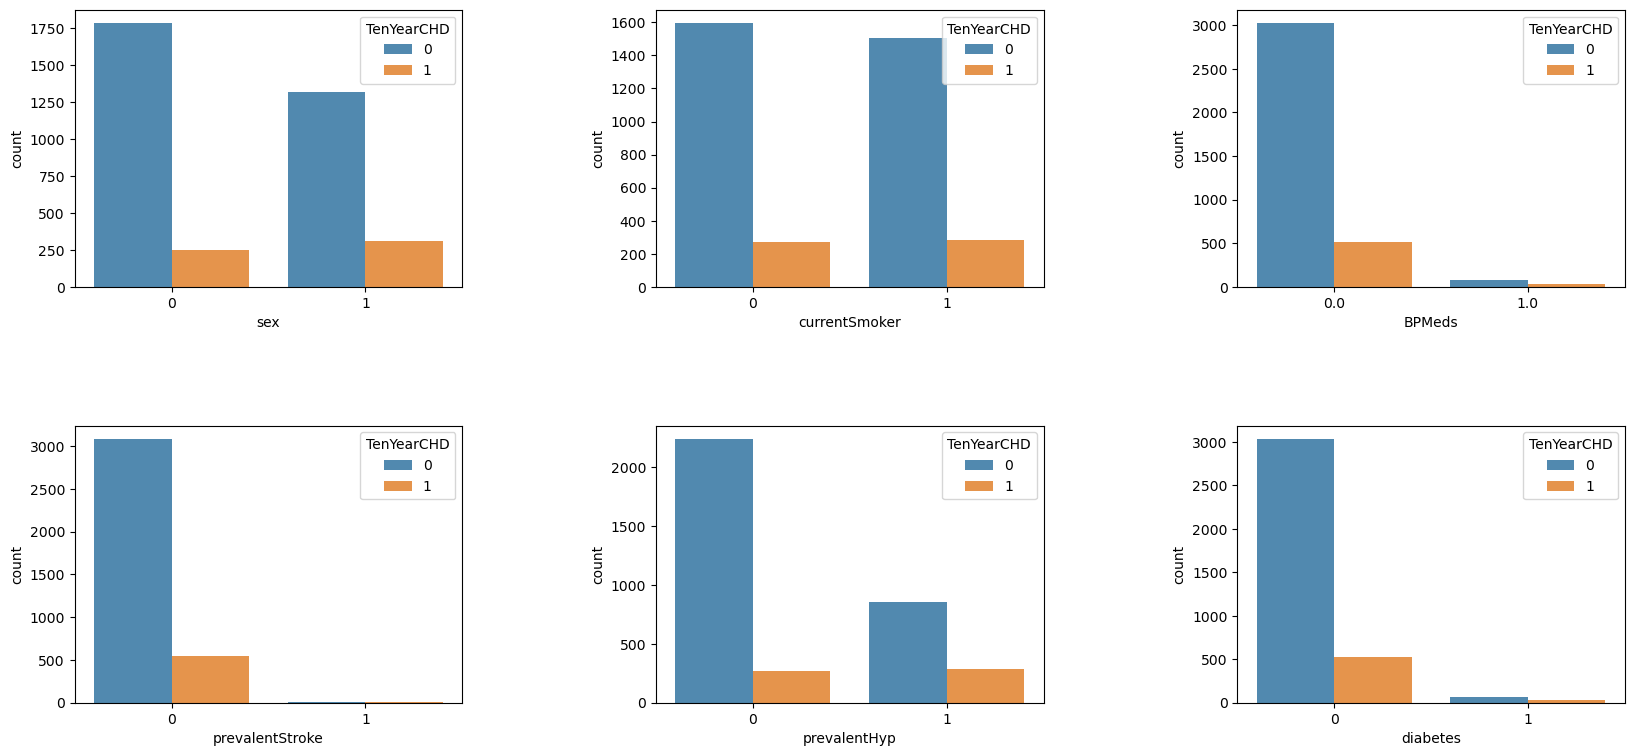

In [69]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in discreteFeat:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , hue = 'TenYearCHD' , data = df , alpha = 0.85)

plt.show()

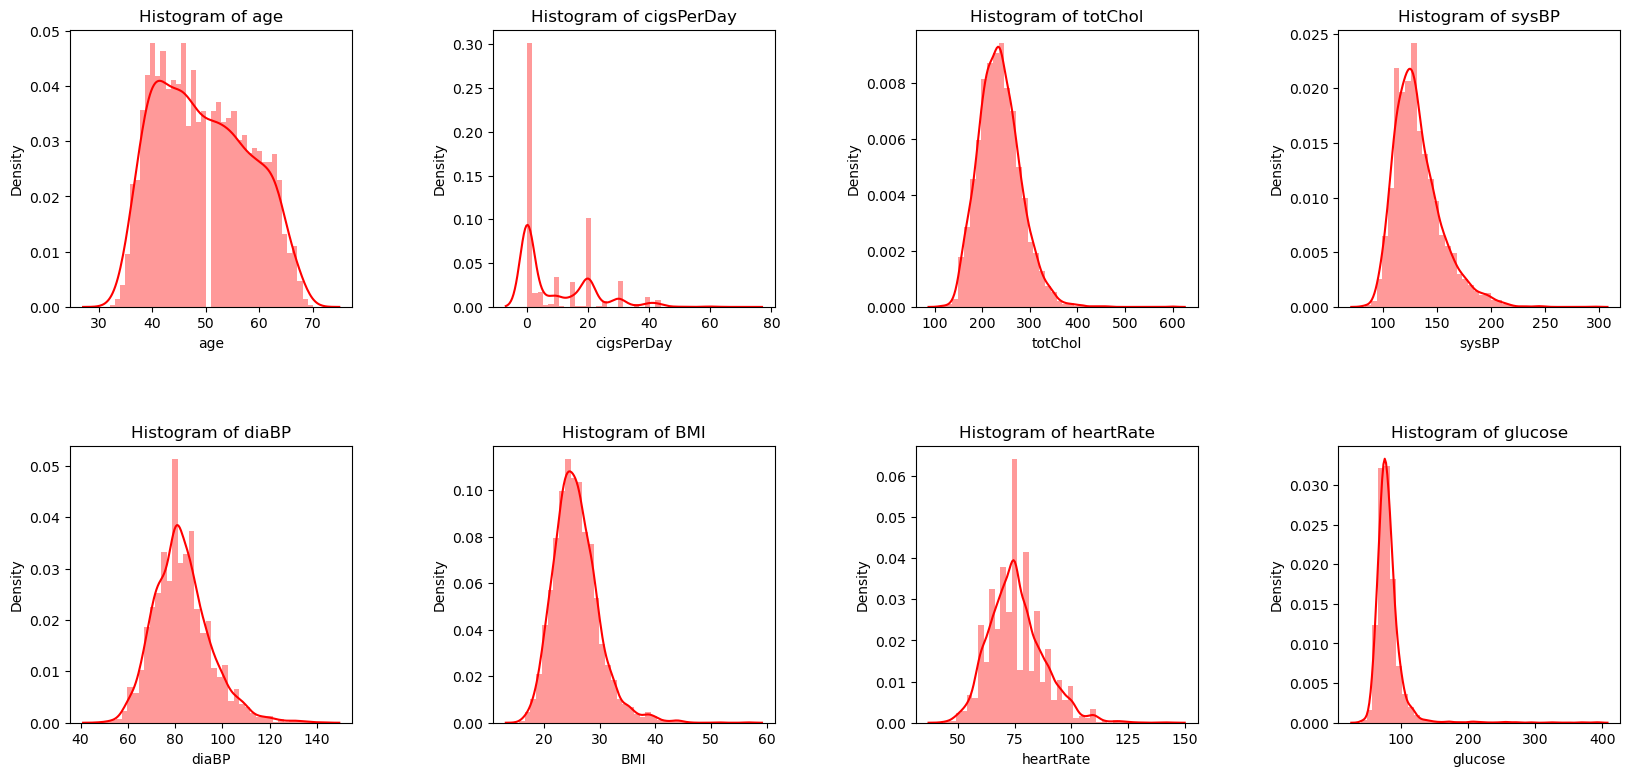

In [70]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in contFeat:
    n += 1
    plt.subplot(2 , 4  , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data ,  , bins = 40 , color = 'red')
    plt.title('Histogram of {}'.format(f))

plt.show()

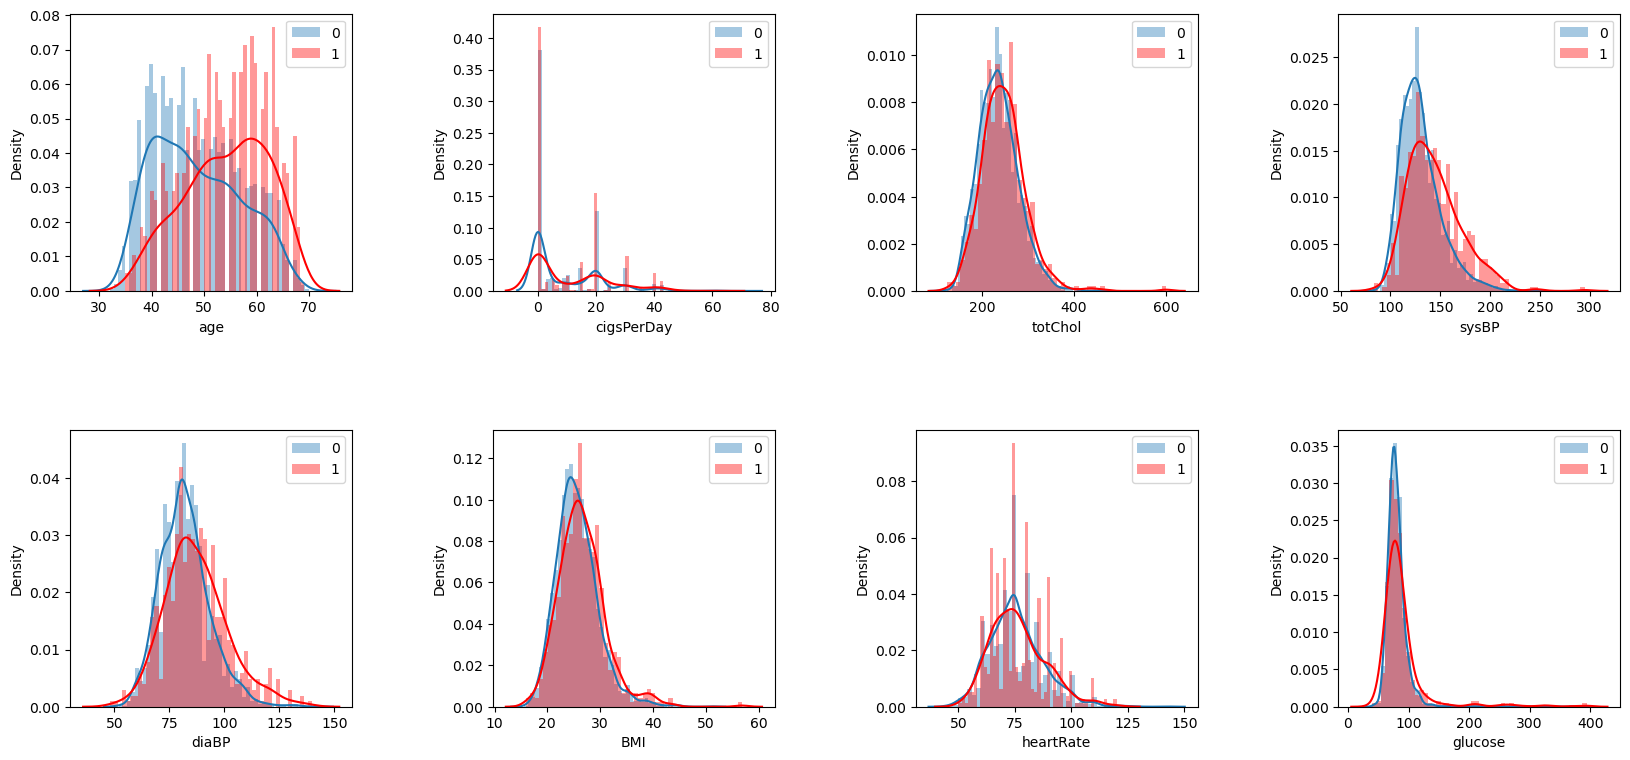

In [71]:
plt.figure(1 , figsize = (20 , 9))
n = 0
for f in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[f][df['TenYearCHD'] == 0] , bins = 50 , label = '0')
    sns.distplot(df[f][df['TenYearCHD'] == 1] , bins = 50 , color = 'red' , label = '1')
    plt.legend()
    
plt.show()

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

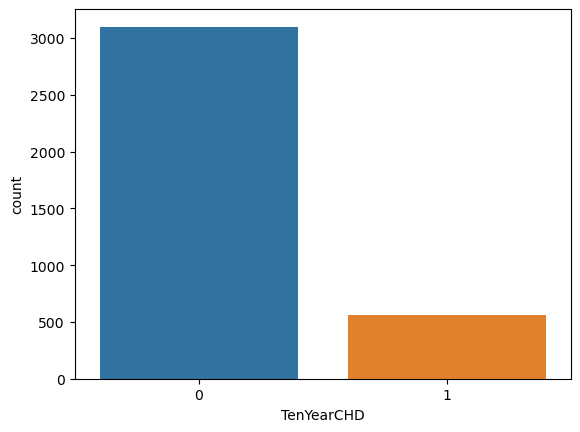

In [74]:
sns.countplot(x='TenYearCHD',data=df)

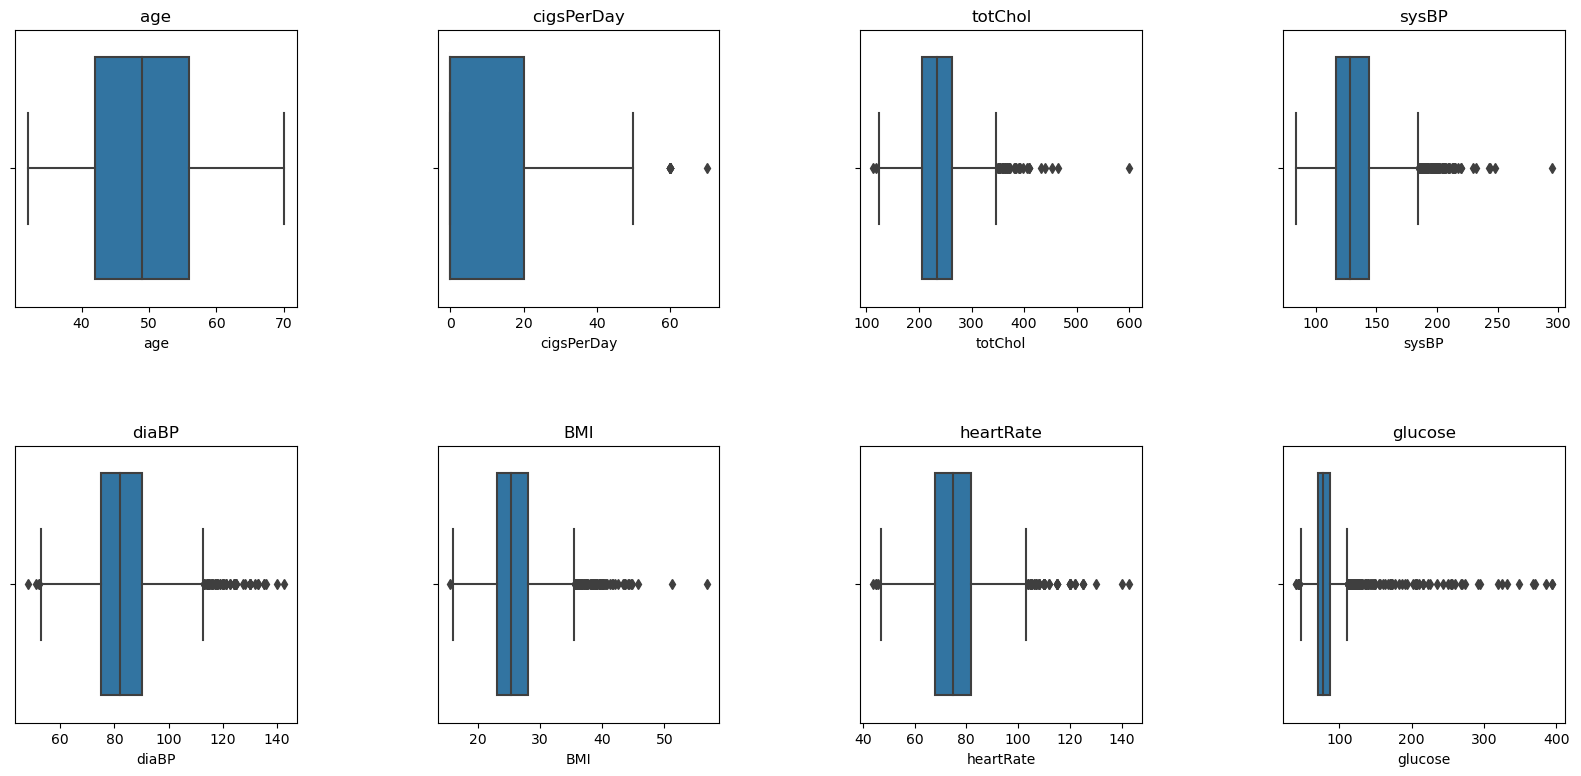

In [76]:
plt.figure(1 , figsize = (20 , 9))

n =  0
for x in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = df[x])
    plt.title('{}'.format(x))
    
plt.show()

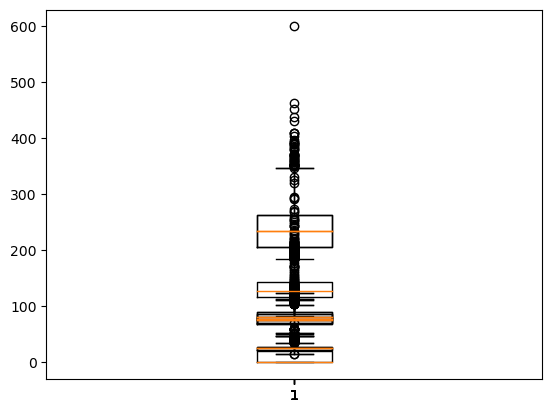

In [77]:
'''treating outliers '''
treating_feature = ['cigsPerDay' , 'totChol' , 'sysBP' , 'diaBP' , 'BMI' , 'heartRate', 'glucose']

'''
upper outliers treatment - replacing with upper whisker
'''
for x in treating_feature:
    b = plt.boxplot(df[x])
    values = [item.get_ydata()[1] for item in b['whiskers']]
    upper_whisker = values[1]
    df[x][df[x] > upper_whisker] = upper_whisker

'''
lower outliers treatment - replacing with lower whisker
'''
treating_feature_lower = [ 'totChol' , 'diaBP' , 'BMI' , 'heartRate', 'glucose']

for x in treating_feature_lower:
    b = plt.boxplot(df[x])
    values = [item.get_ydata()[1] for item in b['whiskers']]
    lower_whisker = values[0]
    df[x][df[x] < lower_whisker] = lower_whisker


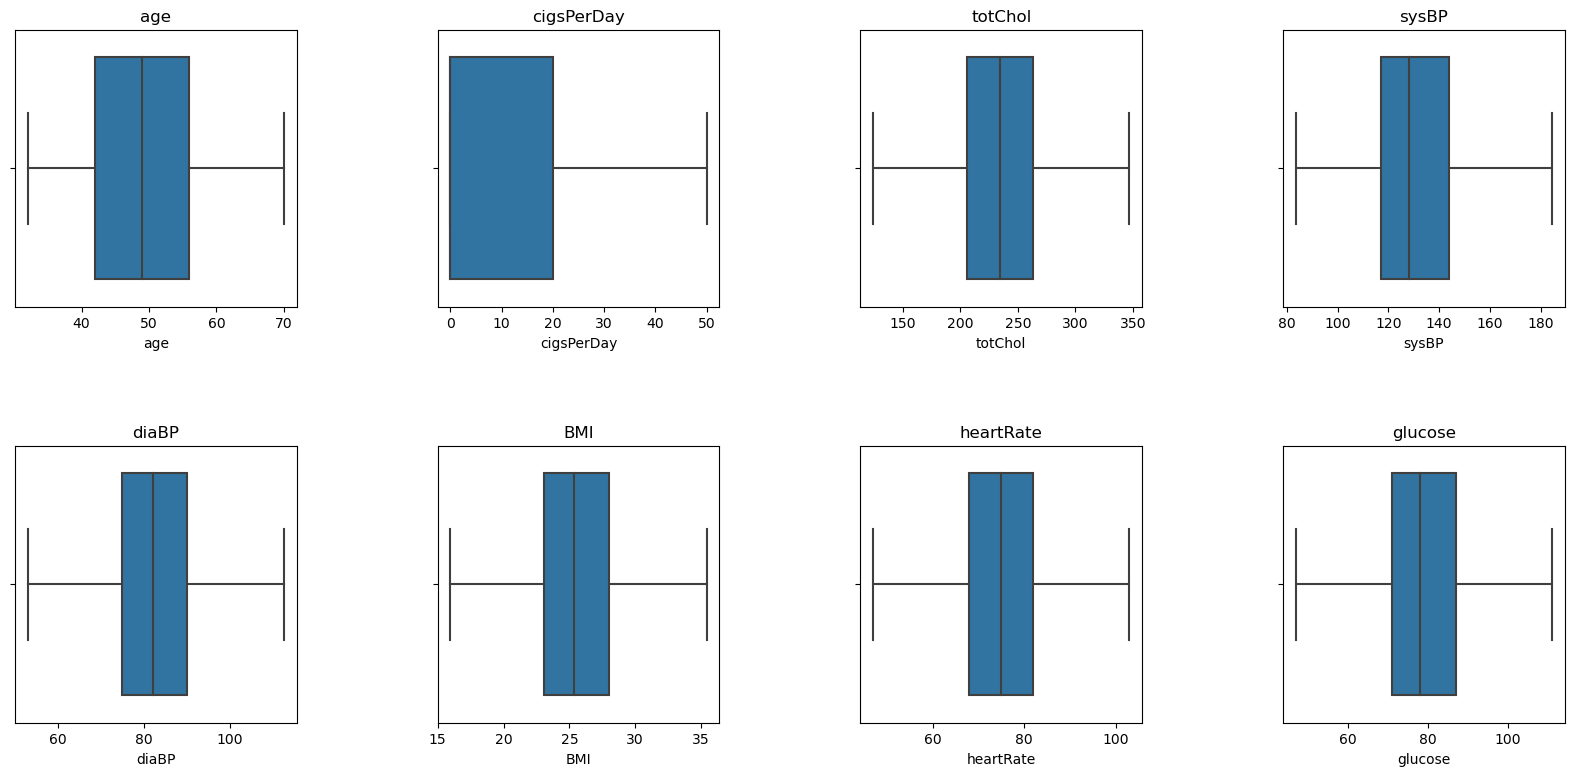

In [78]:
'''
Boxplot after outlier treatment
'''
plt.figure(1 , figsize = (20 , 9))

n =  0
for x in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = df[x])
    plt.title('{}'.format(x))
    
plt.show()

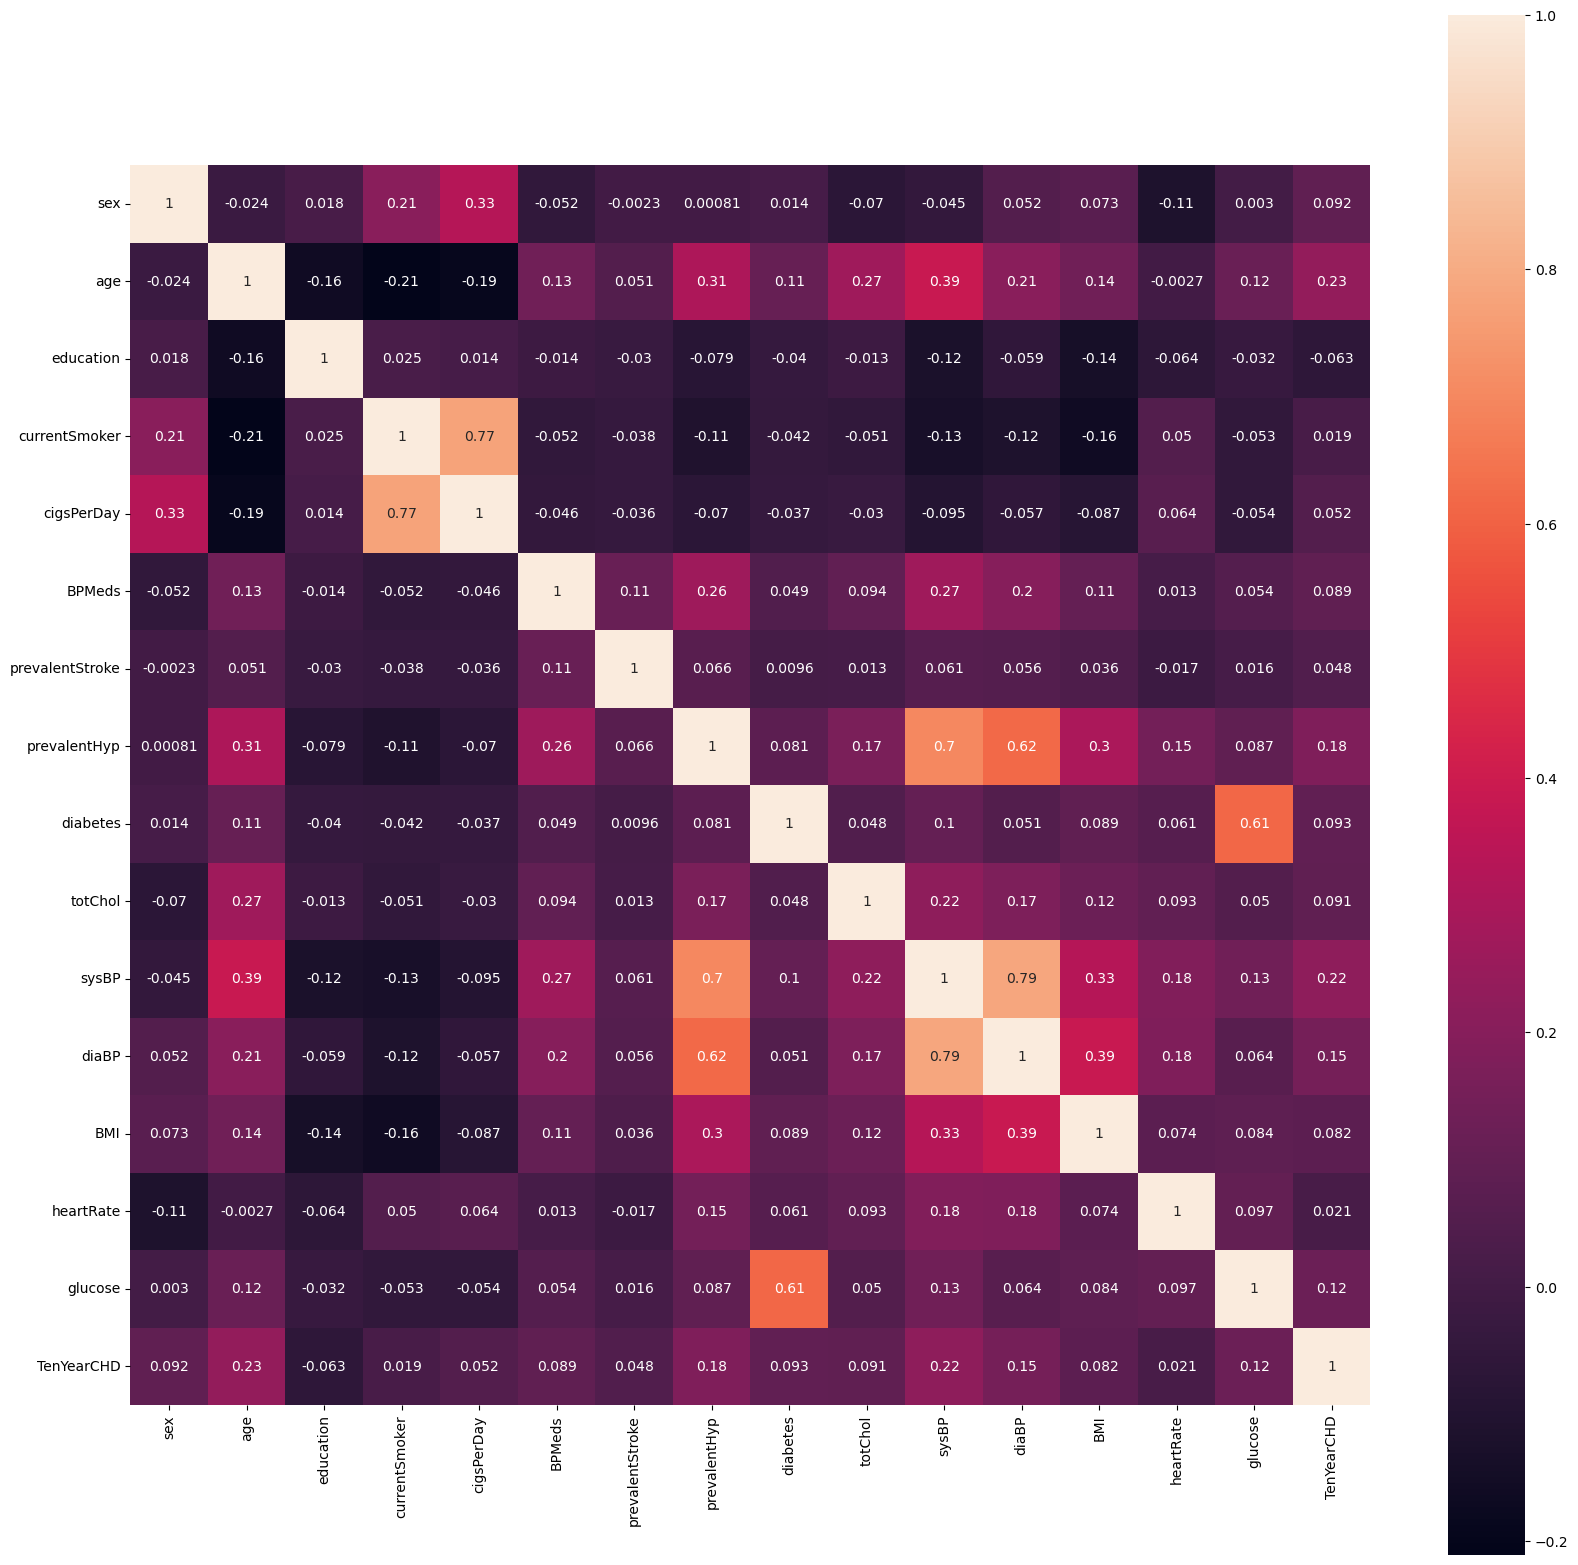

In [75]:
corrmat =  df.corr()

plt.figure(1 ,figsize = (20 , 20))
sns.heatmap(corrmat, annot = True , square  = True)
plt.show()

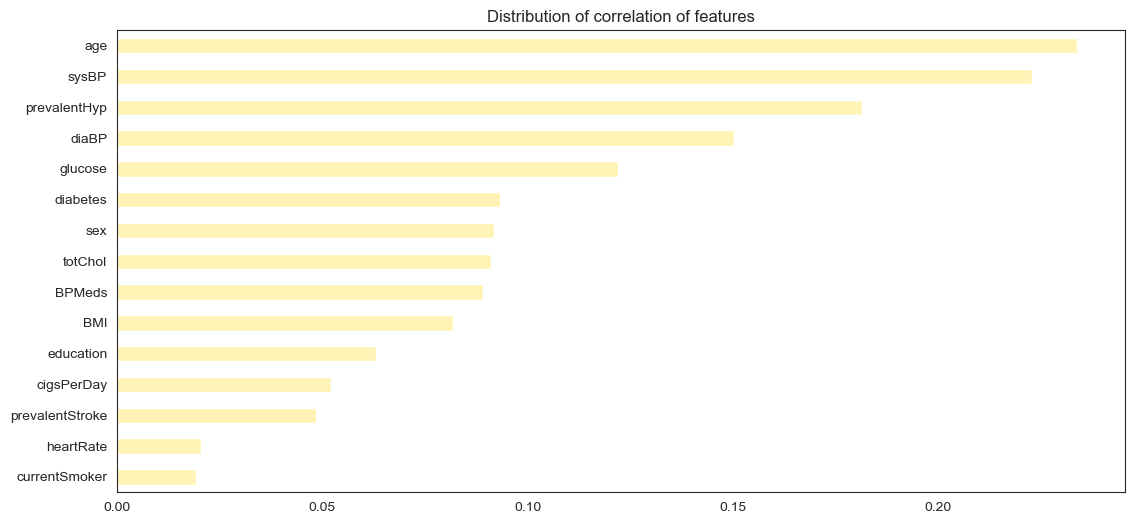

In [84]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(corrmat['TenYearCHD']).sort_values()[:-1].plot.barh()
plt.show()

#make our input and output column seprate

In [85]:
#Select Features
X = df.drop(columns =['TenYearCHD'], axis = 1)

#Select Target 
y = df['TenYearCHD']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (2924, 15)
Shape of testing feature: (732, 15)
Shape of training label: (2924,)
Shape of training label: (732,)


standardization

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

Model Evaluation

Model accuracy

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.860655737704918

Accuracy of the model is 0.86

Confusion matrix

<AxesSubplot:>

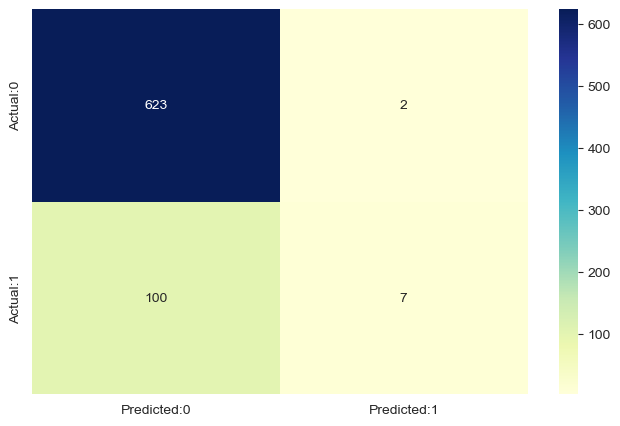

In [96]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [97]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

Model Evaluation - Statistics

In [98]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.860655737704918 
 The Missclassification = 1-Accuracy =  0.139344262295082 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.06542056074766354 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9968 
 Positive Predictive value = TP/(TP+FP) =  0.7777777777777778 
 Negative predictive Value = TN/(TN+FN) =  0.8616874135546335 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  20.443925233644983 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9375796942740132


Roc Curve

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score for Logistic_Regression: ', roc_auc_score(y_test, y_pred))

roc_auc_score for Logistic_Regression:  0.5311102803738318


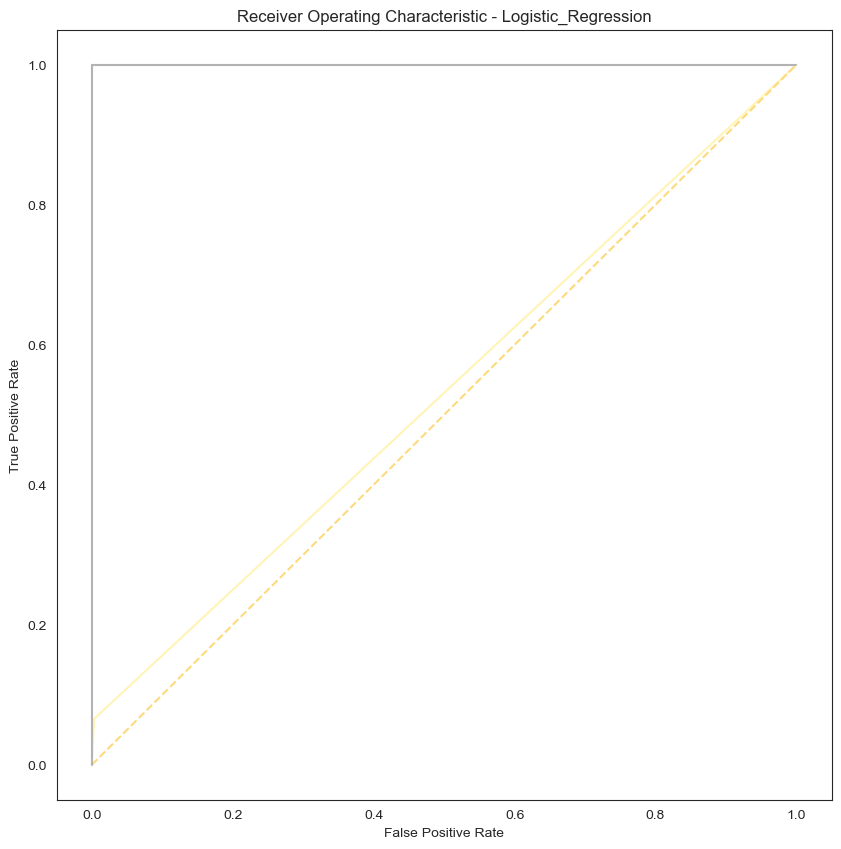

In [106]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic_Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
import pickle
file=open('heart_log.pkl','wb')

#dump information to that file
pickle.dump(logreg , file)